In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Ecommerce_Customers.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


In [8]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [22]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


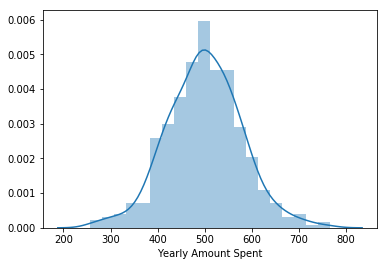

In [10]:
sns.distplot(df['Yearly Amount Spent'])

In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


###  Separate Feature and Target variable

In [12]:
x = df.drop(['Email', 'Address', 'Avatar','Yearly Amount Spent'],axis=1)
y = df['Yearly Amount Spent']

### Split Train and Test data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
     x, y, test_size=0.4, random_state=101)

In [20]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(300, 4) (200, 4)
(300,) (200,)


### Run Linear Regression model

In [23]:
### Instantiate LinearRegresion object
lr = LinearRegression()

In [24]:
# Find the fit of the model
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lr.coef_

array([25.69154034, 37.89259966,  0.56058149, 61.64859402])

In [26]:
X_train.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [28]:
lr.intercept_

-1045.1152168245749

### Test the predictions of Linear Regression Model

In [29]:
predictions = lr.predict(X_test)

In [39]:
print("MAE : ", mean_absolute_error(y_test,predictions))
print("MSE : ",mean_squared_error(y_test,predictions))
print("RMSE :",np.sqrt(mean_squared_error(y_test,predictions)))
print("R-Square :",r2_score(y_test,predictions))

MAE :  7.74267128583874
MSE :  93.83297800820068
RMSE : 9.686742383701587
R-Square : 0.9855061240024658


### Ridge

In [32]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    pred_ridge = ridge.predict(X_test)
    print("Lambda is "+str(i)+" ", ridge.coef_)
    print(mean_absolute_error(y_test,pred_ridge))
    print(r2_score(y_test,pred_ridge))

Lambda is 10  [24.86733471 36.58435432  0.51548147 59.76908772]
8.2562103539988
0.9837759807454898
Lambda is 100  [19.31096885 27.92519111  0.2362791  46.88611418]
17.997707638822817
0.9206664853323654
Lambda is 1000  [ 5.99974024  8.31518471 -0.0860653  14.83459944]
49.053082857889514
0.3999098580307848
Lambda is 10000  [ 0.76138447  1.03719922 -0.02015808  1.89231394]
61.53526810645395
0.05159453782645529
Lambda is 100000  [ 0.0782483   0.10635267 -0.00219929  0.19459209]
63.16297927033426
0.00024694754348464354
Lambda is 1000000  [ 0.00784658  0.01066233 -0.00022186  0.01951449]
63.33067056822713
-0.005122101403905566
Lambda is 10000000  [ 7.84876148e-04  1.06650481e-03 -2.22058563e-05  1.95200336e-03]
63.34749040535493
-0.005661445314887548


### LASSO

In [33]:
for i in [10,100, 1000, 10000, 100000, 1000000, 10000000]:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    pred_lasso = lasso.predict(X_test)
    print("Lambda is "+str(i)+" ", lasso.coef_)
    print(mean_absolute_error(y_test,pred_lasso))
    print(r2_score(y_test,pred_lasso))

Lambda is 10  [15.47658561 26.48192453  0.         52.72981895]
17.637411412421812
0.9254216287893351
Lambda is 100  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 1000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 10000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 100000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 1000000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904
Lambda is 10000000  [ 0.  0. -0.  0.]
63.34935984699618
-0.005721399902177904


### Time on website shows less correlation per LASSO model. Drop Time on website

In [41]:
X1 = x.drop(['Time on Website'],axis=1)

In [42]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
     X1, y, test_size=0.4, random_state=101)

In [43]:
lr_new = LinearRegression()

In [44]:
lr_new.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
lr_new.coef_

array([25.70145245, 37.95507876, 61.59981414])

In [45]:
pred_new = lr_new.predict(X_test1)

### Error in Predictions After dropping Time on website data

In [75]:
print("MAE : ", mean_absolute_error(y_test1,pred_new))
print("MSE : ",mean_squared_error(y_test1,pred_new))
print("RMSE :",np.sqrt(mean_squared_error(y_test1,pred_new)))
print("R-Square :",r2_score(y_test1,pred_new))

MAE :  7.714142430963434
MSE :  93.79530581081744
RMSE : 9.684797664939492
R-Square : 0.9855119430244027


### Error in Predictions Before dropping Time on website data

In [73]:
print("MAE : ", mean_absolute_error(y_test1,predictions))
print("MSE : ",mean_squared_error(y_test1,predictions))
print("RMSE :",np.sqrt(mean_squared_error(y_test1,predictions)))
print("R-Square :",r2_score(y_test1,predictions))

MAE :  7.74267128583874
MSE :  93.83297800820068
RMSE : 9.686742383701587
R-Square : 0.9855061240024658


### Model including Time on website

In [58]:
print("Variables",X_train.columns.values)
print("Co-Efficients",lr.coef_)
print("Intercept", lr.intercept_)

Variables ['Avg. Session Length' 'Time on App' 'Time on Website'
 'Length of Membership']
Co-Efficients [25.69154034 37.89259966  0.56058149 61.64859402]
Intercept -1045.1152168245749


### Model dropping Time on website

In [61]:
print("Variables",X_train1.columns.values)
print("Co-Efficients",lr_new.coef_)
print("Intercept", lr_new.intercept_)

Variables ['Avg. Session Length' 'Time on App' 'Length of Membership']
Co-Efficients [25.70145245 37.95507876 61.59981414]
Intercept -1025.2433259949867


### what if Drop average session length

In [62]:
X2 = X1.drop(['Avg. Session Length'],axis=1)

In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
     X2, y, test_size=0.4, random_state=101)

In [64]:
lr_new2 = LinearRegression()

In [65]:
lr_new2.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
pred_new2 = lr_new2.predict(X_test2)

In [71]:
print("R-Square :",r2_score(y_test,pred_new2))

R-Square : 0.8887403862592357


In [68]:
print("Variables",X_train2.columns.values)
print("Co-Efficients",lr_new2.coef_)
print("Intercept", lr_new2.intercept_)

Variables ['Time on App' 'Length of Membership']
Co-Efficients [35.85822328 62.80791142]
Intercept -155.12943710456403


### what if Drop Length of Membership

In [70]:
X3 = X2.drop(['Length of Membership'],axis=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(
     X3, y, test_size=0.4, random_state=101)
lr_new3 = LinearRegression()
lr_new3.fit(X_train3,y_train)
pred_new3 = lr_new3.predict(X_test3)
print("R-Square :",r2_score(y_test,pred_new3))

R-Square : 0.27051069380179205
